In [173]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.simplefilter("ignore")

In [179]:
def parse_data():
    fname="data.txt"
    col_delim="	"
    val_delim="		"
    d="		"
    df_dict=dict()
    with open(fname,'r') as f:
        for l in f.readlines():
            vals=l.split(val_delim)
            col_name,vals[0]=vals[0].split(col_delim)
            df_dict[col_name]=vals
    return pd.DataFrame(df_dict)

In [187]:
df=parse_data()
df['TIME']=df["TIME"].apply(pd.to_datetime)
df.set_index("TIME")
df.head()

,TIME,EU,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,...,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland
0,2018-12-01,1.6,2.2,2.3,1.6,0.7,1.7,3.3,0.8,0.6,...,0.9,0.6,3.0,1.4,1.9,1.3,2.2,2.0,3.9,0.8
1,2019-01-01,1.5,1.8,2.3,2.0,1.2,1.7,2.8,0.8,0.5,...,0.6,0.6,3.2,1.2,2.2,1.2,2.0,1.9,3.6,0.7
2,2019-02-01,1.6,2.0,2.4,2.4,1.1,1.7,1.9,0.7,0.8,...,1.3,0.9,4.0,1.3,2.3,1.3,1.9,1.1,3.4,0.7
3,2019-03-01,1.6,2.2,2.8,2.6,1.2,1.4,2.2,1.1,1.0,...,1.7,0.8,4.2,1.6,2.7,1.1,1.8,1.4,3.2,0.7
4,2019-04-01,1.9,2.0,3.1,2.4,0.9,2.1,3.2,1.7,1.1,...,2.1,0.9,4.4,1.8,2.4,1.5,2.1,3.3,3.1,1.1


In [193]:
def parse_data2(cols):
    fname="currencies.xls"
    df=pd.read_excel(fname)
    df=df.iloc[1:237]
    df['data']=df['data'].apply(pd.to_datetime)
    df.set_index('data')
    for x in cols:
        df[x]=df[x].astype(float)
    return df

In [267]:
cols=['1 THB','1 BRL','1 MYR']
df=parse_data2()

In [268]:
df.columns

Index(['data', '1 THB', '1 USD', '1 AUD', '1 HKD', '1 CAD', '1 NZD', '1 SGD',
       '1 EUR', '100 HUF', '1 CHF', '1 GBP', '1 UAH', '100 JPY', '1 CZK',
       '1 DKK', '100 ISK', '1 NOK', '1 SEK', '1 HRK', '1 RON', '1 BGN',
       '1 TRY', '1 ILS', '100 CLP', '1 PHP', '1 MXN', '1 ZAR', '1 BRL',
       '1 MYR', '1 RUB', '10000 IDR', '100 INR', '100 KRW', '1 CNY', '1 XDR',
       'nr tabeli', 'pełny numer tabeli'],
      dtype='object')

In [269]:
def display_rolling_stats(df1,column):
    rolling_mean = df1[column].rolling(window = 12).mean()
    rolling_std = df1[column].rolling(window = 12).std()
    plt.gcf().set_size_inches((7,5))
    plt.plot(df1[column], color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation: '+column)
    plt.show()

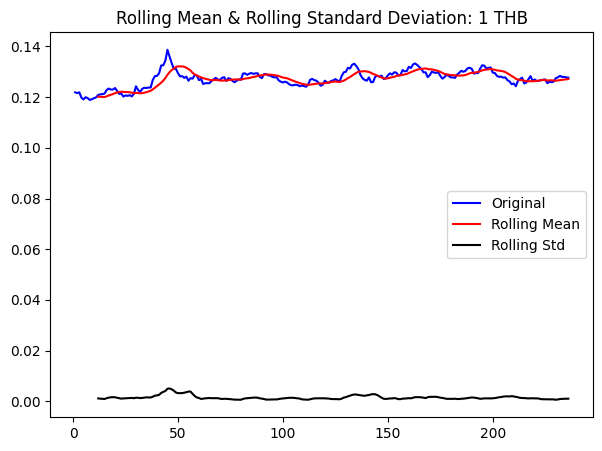

In [270]:
display_rolling_stats(df,cols[0])

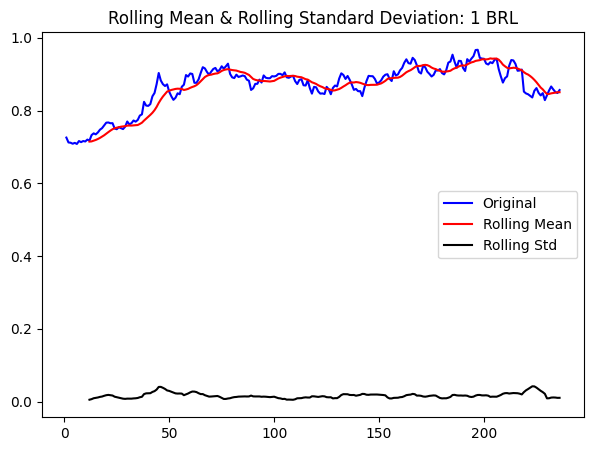

In [271]:
display_rolling_stats(df,cols[1])

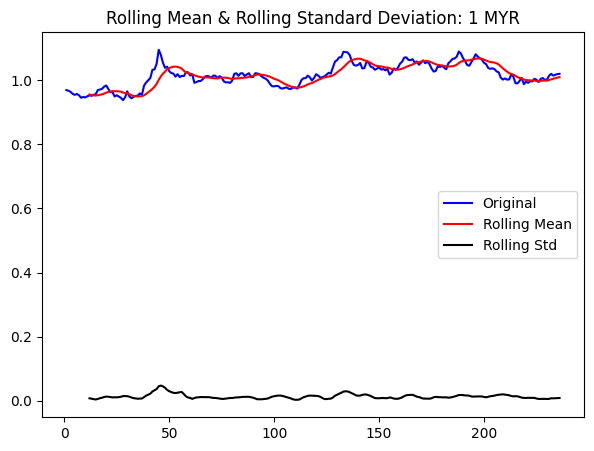

In [272]:
display_rolling_stats(df,cols[2])

In [280]:

result = adfuller(df['1 UAH'])
print(cols[0])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

1 THB
ADF Statistic: -1.188030848931866
p-value: 0.678723229654809
Critical Values:
	1%: -3.4584868856997004
	5%: -2.873918902362675
	10%: -2.573367247623359


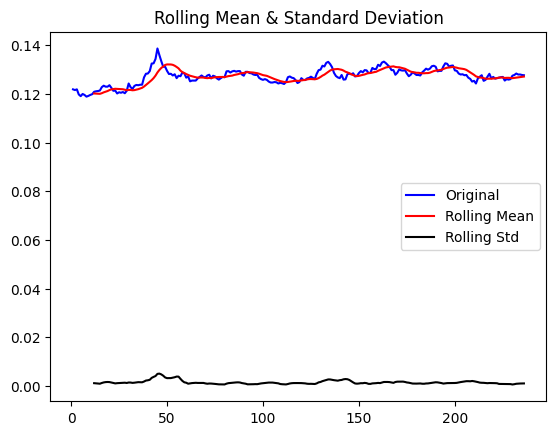

ADF Statistic: -3.4444445077498327
p-value: 0.009533909540959581
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503


In [290]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    
get_stationarity(df['1 THB'])

In [293]:
df_log = np.log(df[cols[0]])
plt.plot(df_log)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method